<img src='../Logo.png' />

# <center> Learning Linear Regression with Python

A real estate agent is looking for help in predicting house prices in various regions of the United States. It would be great if you could somehow create a model that allows them to input a few features of a house and get back an estimated price.

The real estate agent asked if you could assist using your new data science skills. You said yes and decided that linear regression might be a good way to tackle this problem!

To help you, the agent provides information about a sample of 5,000 houses from different regions in the U.S. This information is available in the data table: **"Maisons.csv"**.

This dataset contains the following features:
* `'Revenu_moyen'`: The average income of residents in the city where the house is located.
* `'Age_moyen'`: The average age of houses in the city.
* `'Nb_moyen_pieces'`: The average number of rooms in houses in the city.
* `'Nb_moyen_chambres'`: The average number of bedrooms in houses in the city.
* `'Population'`: The population of the city.
* `'Prix'`: The price the house was sold for.
* `'Adresse'`: The address of the house.

**Objective**: Apply the supervised learning technique of linear regression to predict the price of a new house based on its characteristics.


### Importing Libraries
To implement linear regression learning, we start by importing the necessary Python libraries.

* **pandas**: This is the go-to library for handling data tables.
* **numpy**: Used for manipulating matrices or multidimensional arrays, as well as mathematical functions that operate on these arrays.
* **matplotlib.pyplot**: Matplotlib is a library used to plot and visualize data through graphs.
* **seaborn**: A data visualization library that builds on Matplotlib by replacing some default settings and functions while adding new features.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive Study of the Data Table

In [2]:
# Importing the Data Table

Maisons = pd.read_csv('Maisons.csv')

In [3]:
# Displaying the first five rows of the data table.

Maisons.head()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix,Adresse
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Information About the Data Table

Maisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Revenu_moyen       5000 non-null   float64
 1   Age_moyen          5000 non-null   float64
 2   Nb_moyen_pieces    5000 non-null   float64
 3   Nb_moyen_chambres  5000 non-null   float64
 4   Population         5000 non-null   float64
 5   Prix               5000 non-null   float64
 6   Adresse            5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Descriptive statistics of the variables in the data table

Maisons.describe()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
# Displaying the names of the variables in the data table

Maisons.columns

Index(['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres',
       'Population', 'Prix', 'Adresse'],
      dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9292\1565227976.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Maisons['Prix'])


<Axes: xlabel='Prix', ylabel='Density'>

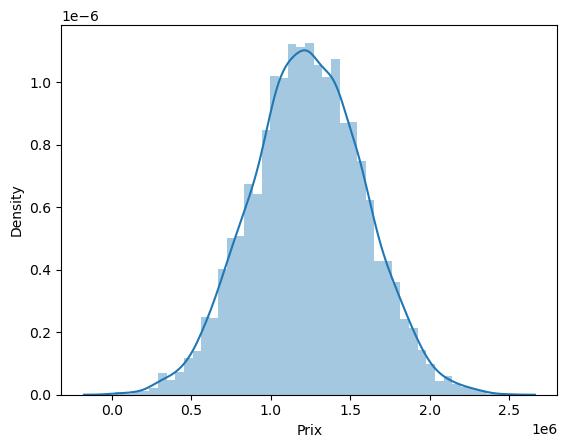

In [7]:
# Study of the observed distribution of the target variable

sns.distplot(Maisons['Prix'])

### Etude de la dépendance linéaire entre les variables de la table  

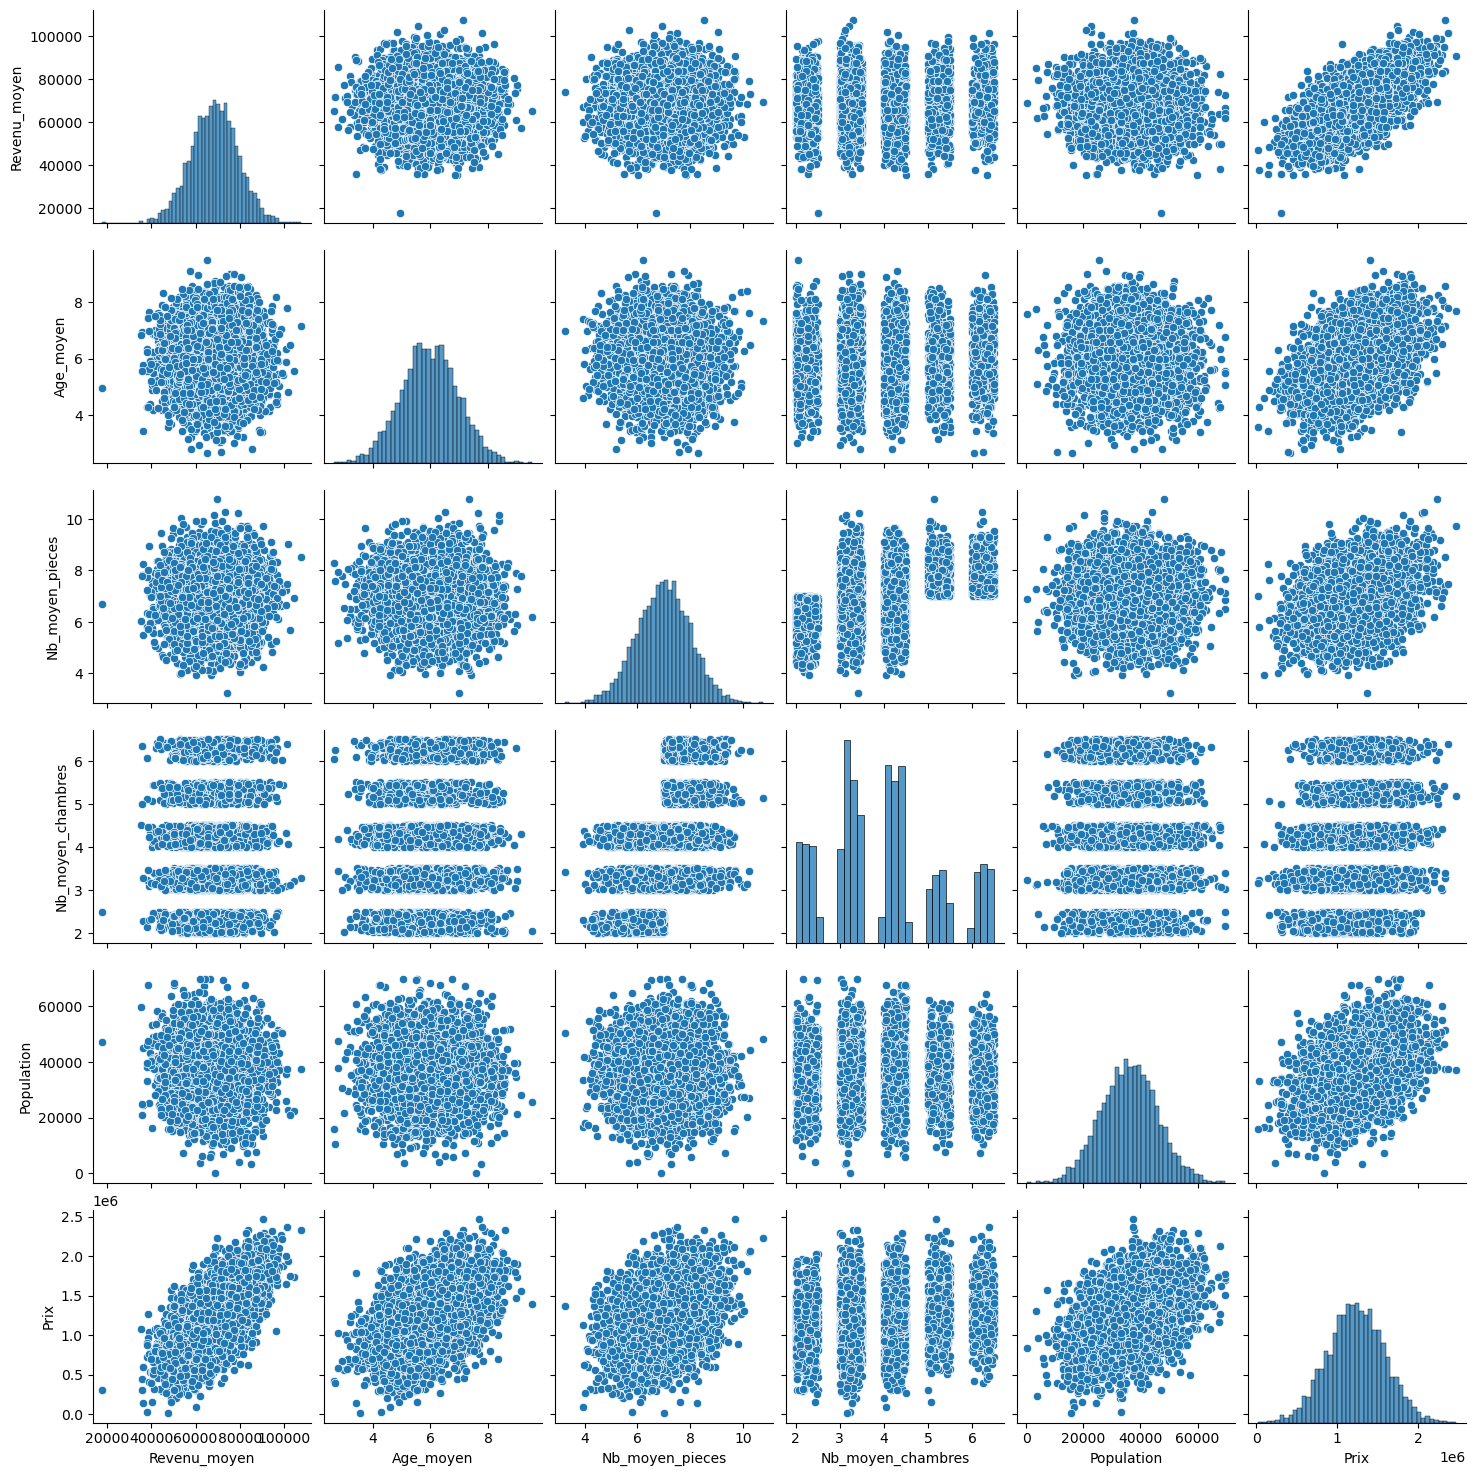

In [8]:
# Study of the linear dependence between the variables in the data table

sns.pairplot(Maisons)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9292\2062496071.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Maisons['Prix'])


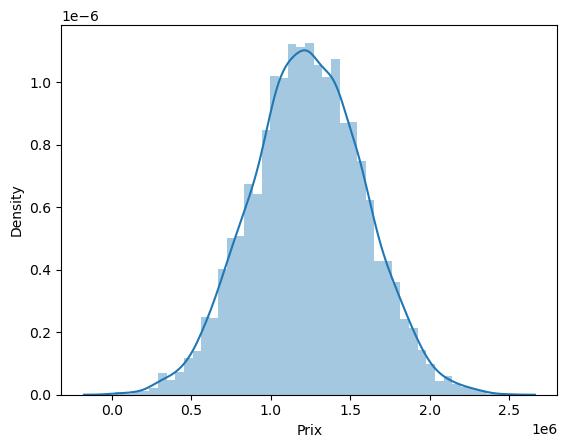

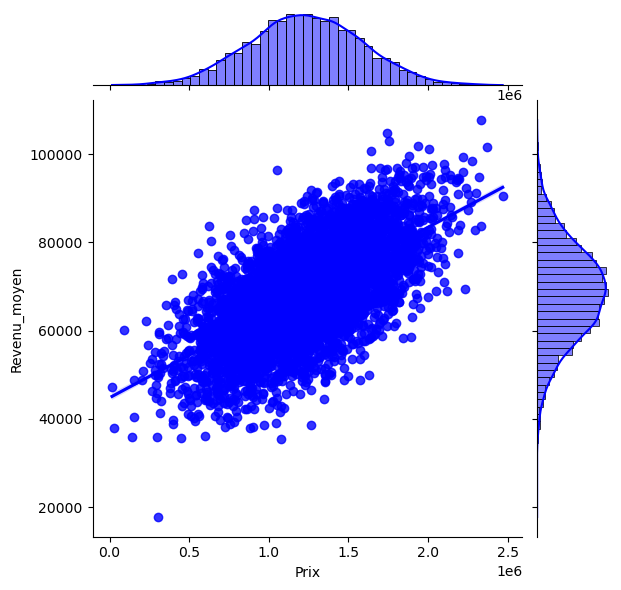

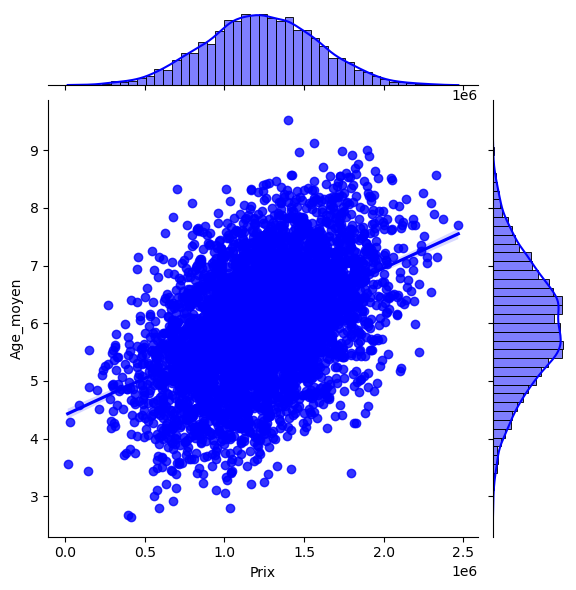

In [9]:
# Graph of the observed distribution of the target variable

sns.distplot(Maisons['Prix'])
sns.jointplot(x="Prix", y="Revenu_moyen", data=Maisons, kind="reg", color='b')
sns.jointplot(x="Prix", y="Age_moyen", data=Maisons, kind="reg", color='b')

                   Revenu_moyen  Age_moyen  Nb_moyen_pieces  \
Revenu_moyen           1.000000  -0.002007        -0.011032   
Age_moyen             -0.002007   1.000000        -0.009428   
Nb_moyen_pieces       -0.011032  -0.009428         1.000000   
Nb_moyen_chambres      0.019788   0.006149         0.462695   
Population            -0.016234  -0.018743         0.002040   
Prix                   0.639734   0.452543         0.335664   

                   Nb_moyen_chambres  Population      Prix  
Revenu_moyen                0.019788   -0.016234  0.639734  
Age_moyen                   0.006149   -0.018743  0.452543  
Nb_moyen_pieces             0.462695    0.002040  0.335664  
Nb_moyen_chambres           1.000000   -0.022168  0.171071  
Population                 -0.022168    1.000000  0.408556  
Prix                        0.171071    0.408556  1.000000  


<Axes: >

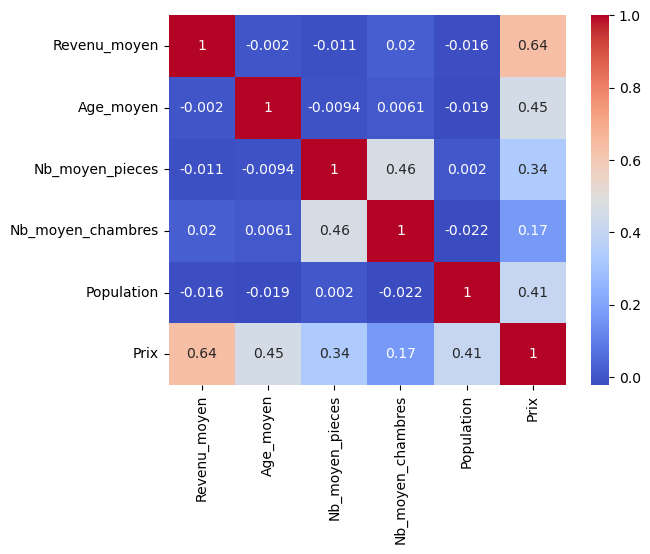

In [10]:
# Exclude non-numeric columns
numeric_data = Maisons.select_dtypes(include=['float64', 'int64'])

# Calcul des coefficients de correlation
corr_Maisons = numeric_data.corr()
print(corr_Maisons)

# Heatmap of the correlation matrix
sns.heatmap(corr_Maisons, annot=True, cmap='coolwarm')

Conclusion:
The most influential variables on house prices (Prix) are:

Revenu_moyen (strong correlation).

Age_moyen, Population, and Nb_moyen_pieces (moderate correlations).

Variables like Nb_moyen_chambres have a limited impact on price and might be less significant in a regression model.

### Implementation of Linear Regression with statsmodels

In [11]:
#importing the package to perform a linear regression model
import statsmodels.formula.api as smf

#declaring the model
reg_linear = smf.ols('Prix ~ Revenu_moyen + Age_moyen + Nb_moyen_pieces + Population + Nb_moyen_chambres', 
                     data=Maisons)

#starting the calculations
resultat_reg = reg_linear.fit()

#displaying the results
print(resultat_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:47:20   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.637e+06   1.72e+0

In [12]:
# Since the variable 'Nb_moyen_chambres' is not significant, we will remove it from the model

reg_linear = smf.ols('Prix ~ Revenu_moyen + Age_moyen + Nb_moyen_pieces + Population', data=Maisons)
resultat_reg = reg_linear.fit()
print(resultat_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:47:20   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.638e+06   1.72e+04   -1

## <center> Linear Regression Learning

In the following steps, we will train our linear regression model. To do this, we first need to split our data into an array **X** containing the features, and an array **Y** containing the target variable, which in our case is the **'Prix'** (Price) column.

We will exclude the **'Adresse'** column because it contains only textual information that the linear regression model cannot use, and the **'Nb_moyen_chambres'** column because it does not contain meaningful information.

### X and Y arrays


In [13]:
X = Maisons[['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Population']]
Y = Maisons['Prix']

## Training and Testing Samples

We will now split the data into a training sample (80%) and a testing sample (20%).  
We will train the model on the training sample, then use the testing sample to evaluate the model.


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Model Development and Training

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
print(LinearRegression)

<class 'sklearn.linear_model._base.LinearRegression'>


In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation and Validation

Let’s evaluate the model by examining its coefficients and understanding how we can interpret them.


In [20]:
# Print the intercept of the linear regression model
print(lr.intercept_)

-2640826.441990788


In [21]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Revenu_moyen,21.570435
Age_moyen,165501.853248
Nb_moyen_pieces,121642.083158
Population,15.334530


### Interpretation of the Coefficients:

- Holding all other features constant, an increase of one unit in **average income** results in an **increase of \$21.57 in house price**.
- Holding all other features constant, an increase of one unit in **average age of houses** results in an **increase of \$165,501.85 in house price**.
- Holding all other features constant, an increase of one unit in the **average number of rooms** results in an **increase of \$121,642.08 in house price**.
- Holding all other features constant, an increase of one unit in **population** results in an **increase of \$15.33 in house price**.

## Predictions from Our Model

Let's consider the predictions for our test sample and assess the quality of these predictions.

In [22]:
predictions = lr.predict(X_test)

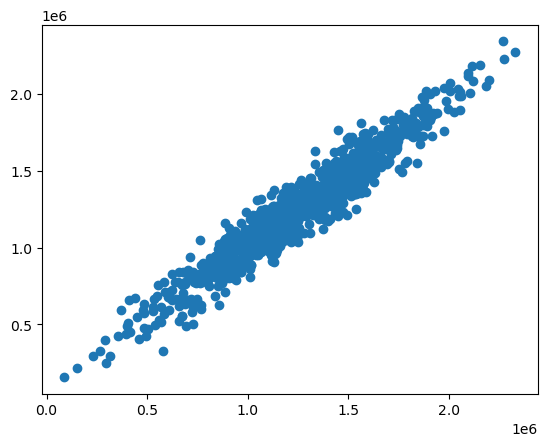

In [23]:
plt.scatter(Y_test,predictions)

**Histogram of Residuals**

C:\Users\Dell\AppData\Local\Temp\ipykernel_9292\1960946261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions),bins=50);


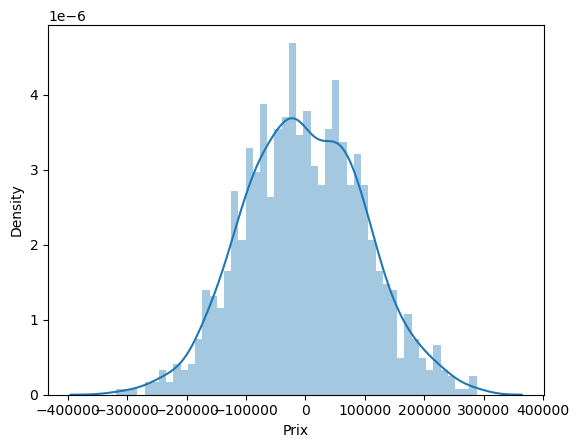

In [24]:
sns.distplot((Y_test-predictions),bins=50);

## Evaluation Criteria for the Regression Model

There are three evaluation criteria for regression problems:

**Mean Absolute Error** (MAE) is the average of the absolute errors:

$$\frac{1}{n}\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the average of the squared errors:

$$\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the average of the squared errors:

$$\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparison of these three criteria:

- **MAE** is the simplest to understand, as it represents the average error.
- **MSE** is more popular than MAE because MSE is more sensitive to larger errors, which tends to be useful in practice.
- **RMSE** is even more popular than MSE because RMSE is interpretable when compared to the "Y" values, as they share the same units.

All of these criteria are **loss functions** that we aim to minimize.


In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 81251.34759064432
MSE: 10096507277.466854
RMSE: 100481.37776457315


In [27]:
# Calculation of the R-squared coefficient

train_score_lr = lr.score(X_train, Y_train)
test_score_lr = lr.score(X_test, Y_test)

print("The train score for linear model is {}".format(train_score_lr))
print("The test score for linear model is {}".format(test_score_lr))

The train score for linear model is 0.9171081173624911
The test score for linear model is 0.9212006420631222


# <center> Penalized Regression Model </center>

* **Important Note**

Unlike linear regression, penalized linear regression models are applied on standardized (centered and scaled) data.


In [28]:
# Standardization of the data to obtain centered and reduced data

from sklearn.preprocessing import StandardScaler

# Selecting the relevant columns for standardization
df = Maisons[['Prix', 'Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres', 'Population']]

# Applying standardization
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

# Creating a new DataFrame with standardized data
df_final = pd.DataFrame(df_sc, columns=['Prix', 'Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres', 'Population'])

# Creating data frames for the target ('Y_sc') and features ('X_sc')
X_sc = df_final[['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres', 'Population']]
Y_sc = df_final['Prix']

In [29]:
# Training and testing samples
from sklearn.model_selection import train_test_split

X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_sc, Y_sc, test_size=0.2, random_state=101)

## Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

# Define the Ridge regression model
model_Ridge = Ridge()

# Determination of hyperparameters (Model tuning)
from sklearn.model_selection import GridSearchCV

# Dictionary of hyperparameters
hyperparametre = {'alpha': [0.001, 0.01, 1, 10, 50, 100, 500]}

# Grid search for hyperparameter tuning
recherche_Ridge = GridSearchCV(model_Ridge, param_grid=hyperparametre, scoring='neg_mean_squared_error', cv=10)

# Fitting the model
resultats = recherche_Ridge.fit(X_sc_train, Y_sc_train)

# Summarize the results
print('MSE: %.3f' % resultats.best_score_)
print('Config: %s' % resultats.best_params_)

MSE: -0.083
Config: {'alpha': 1}


In [31]:
# Ridge Model Implementation

model_Ridge = Ridge(alpha=1)

# Fitting the Ridge regression model
model_Ridge.fit(X_sc_train, Y_sc_train)

# Evaluation of the Ridge model using training and test data
train_score_ridge = model_Ridge.score(X_sc_train, Y_sc_train)
test_score_ridge = model_Ridge.score(X_sc_test, Y_sc_test)

# Display the scores
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


The train score for ridge model is 0.917146561094633
The test score for ridge model is 0.9211744567107011


In [32]:
# Comparison of Linear Regression Coefficients and Ridge Regression Model Coefficients
lm= LinearRegression()
lm.fit(X_sc_train, Y_sc_train)

print("The coefficients of the linear regression and Ridge model are respectively:")
print("Linear Regression:", lm.coef_)
print("Ridge Regression:", model_Ridge.coef_)

The coefficients of the linear regression and Ridge model are respectively:
Linear Regression: [0.65093792 0.46454617 0.34323617 0.0069892  0.43120324]
Ridge Regression: [0.65076987 0.46442239 0.34312239 0.00704089 0.43109257]


## Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define model
model_Lasso = Lasso()

# Hyperparameter tuning
# Dictionary of hyperparameters
hyperparametre = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

recherche_lasso = GridSearchCV(model_Lasso, param_grid=hyperparametre, scoring='neg_mean_squared_error', cv=10)

resultats = recherche_lasso.fit(X_sc_train, Y_sc_train)

# Summarize
print('MSE: %.3f' % resultats.best_score_)
print('Config: %s' % resultats.best_params_)


MSE: -0.083
Config: {'alpha': 0.0001}


In [34]:
# Lasso Model Implementation

model_Lasso = Lasso(alpha=0.0001)

# Fitting the model
model_Lasso.fit(X_sc_train, Y_sc_train)

# Train and test score for Lasso regression
train_score_lasso = model_Lasso.score(X_sc_train, Y_sc_train)
test_score_lasso = model_Lasso.score(X_sc_test, Y_sc_test)

print("The train score for lasso model is {}".format(train_score_lasso))
print("The test score for lasso model is {}".format(test_score_lasso))


The train score for lasso model is 0.9171465810045579
The test score for lasso model is 0.92117563801556


In [35]:
# Comparison of coefficients of Linear Regression, Ridge, and Lasso models

print("The coefficients of the linear regression, Ridge, and Lasso models are respectively:")
print(lm.coef_)
print(model_Ridge.coef_)
print(model_Lasso.coef_)


The coefficients of the linear regression, Ridge, and Lasso models are respectively:
[0.65093792 0.46454617 0.34323617 0.0069892  0.43120324]
[0.65076987 0.46442239 0.34312239 0.00704089 0.43109257]
[0.6508358  0.46444273 0.34317586 0.00691685 0.43109879]


# Comparison of Linear Regression, Ridge, and Lasso Models

In [36]:
def compare_models(train_score_lm, test_score_lm, train_score_ridge, test_score_ridge, train_score_lasso, test_score_lasso):
    # Afficher les scores des modèles
    print("The train score for linear model is {}".format(train_score_lm))
    print("The test score for linear model is {}".format(test_score_lm))
    print("The train score for ridge model is {}".format(train_score_ridge))
    print("The test score for ridge model is {}".format(test_score_ridge))
    print("The train score for lasso model is {}".format(train_score_lasso))
    print("The test score for lasso model is {}".format(test_score_lasso))
    
    # Comparer les scores de test pour déterminer le meilleur modèle
    scores = {
        "Linear Model": test_score_lm,
        "Ridge Model": test_score_ridge,
        "Lasso Model": test_score_lasso
    }
    
    best_model = max(scores, key=scores.get)
    print("\nThe best model is: {} with a test score of {}".format(best_model, scores[best_model]))

In [37]:
compare_models(train_score_lr, test_score_lr, train_score_ridge, test_score_ridge, train_score_lasso, test_score_lasso)

The train score for linear model is 0.9171081173624911
The test score for linear model is 0.9212006420631222
The train score for ridge model is 0.917146561094633
The test score for ridge model is 0.9211744567107011
The train score for lasso model is 0.9171465810045579
The test score for lasso model is 0.92117563801556

The best model is: Linear Model with a test score of 0.9212006420631222


The best model is: Linear Model with a test score of 0.9212006420631222

In [38]:
## Prédiction pour une nouvelle entrée de ['Duree', 'Age', 'Revenu_moyen','Duree_internet', 'Genre']
## X = Maisons[['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces',, 'Population']]
x_new = np.array([[70000, 10, 3, 50000]])
print(x_new)


[[70000    10     3 50000]]


In [39]:
Prix_pred = lr.predict(x_new)
print(Prix_pred)

[1655775.31137344]


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
# Importing necessary libraries for the interface
import ipywidgets as widgets
from IPython.display import display

# Define input widgets for each feature
revenu_moyen = widgets.FloatText(description='Revenu Moyen (Average Income):')
age_moyen = widgets.FloatText(description='Age Moyen (Average Age):')
nb_moyen_pieces = widgets.FloatText(description='Nb Moy. Pièces (Average Number of Rooms):')
population = widgets.FloatText(description='Population (Population):')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Price")

# Output widget to display the prediction
output = widgets.Output()

# Define the prediction function
def predict_price(change):
    with output:
        output.clear_output()
        # Collect input values
        x_new = np.array([[revenu_moyen.value, age_moyen.value, nb_moyen_pieces.value, population.value]])
        # Make prediction
        predicted_price = lr.predict(x_new)
        print(f"Predicted Price: ${predicted_price[0]:,.2f}")

# Attach the prediction function to the button
predict_button.on_click(predict_price)

# Display the widgets
display(revenu_moyen, age_moyen, nb_moyen_pieces, population, predict_button, output)

FloatText(value=0.0, description='Revenu Moyen (Average Income):')

FloatText(value=0.0, description='Age Moyen (Average Age):')

FloatText(value=0.0, description='Nb Moy. Pièces (Average Number of Rooms):')

FloatText(value=0.0, description='Population (Population):')

Button(description='Predict Price', style=ButtonStyle())

Output()